In [73]:
cd Data

/Users/ryamaguchi/Desktop/Data


In [ ]:
# Hybrid fitness

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_mig.csv に保存しました。


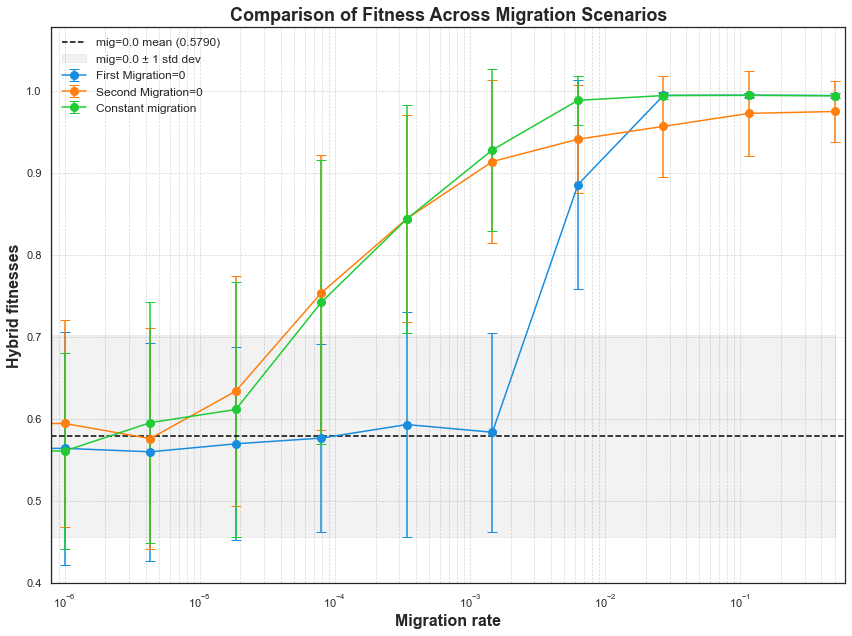

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_with_std.pdf に保存しました。


In [121]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat']:
                continue  # Use 'FGM_fitness_mig={}_run={}_p3.dat' when m=0.0

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

for idx, template in enumerate(file_templates):
    m_values_new = [float(m.replace('e', 'E')) for m in mig_values]
    m_all_average_values = [
        np.mean(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]
    m_std_values = [
        np.std(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]

    
    plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-', color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat
mig_0_mean = np.mean(average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0'])
mig_0_std = np.std(average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0'])
plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
plt.fill_between([min(m_values_new), max(m_values_new)],
                 mig_0_mean - mig_0_std,
                 mig_0_mean + mig_0_std,
                 color='black', alpha=0.05, label='mig=0.0 ± 1 std dev')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # Set y-axis minimum value to 0.4
plt.ylim(0.4, None)  # Set y-axis minimum value to 0.4
plt.xlabel('Migration rate', fontsize=16, fontweight='bold')
plt.ylabel('Hybrid fitnesses', fontsize=16, fontweight='bold')
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.title("Comparison of Fitness Across Migration Scenarios", fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_with_std.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_mig.csv に保存しました。


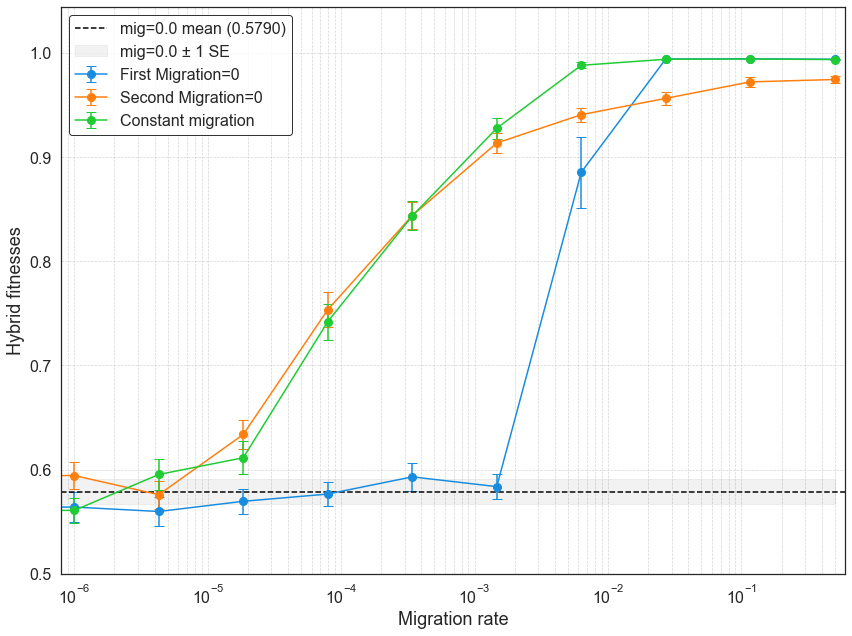

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_with_std.pdf に保存しました。


In [132]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat']:
                continue  # Use 'FGM_fitness_mig={}_run={}_p3.dat' when m=0.0

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = [float(m.replace('e', 'E')) for m in mig_values]
    m_all_average_values = [
        np.mean(average_results[template][mig]) if average_results[template][mig] else 0 for mig in mig_values
    ]
    m_std_values = [
        np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
        if average_results[template][mig] else 0 for mig in mig_values
    ]

    # Plot mean values with standard errors (add horizontal bars to error bar tips)
    plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-', 
                 color=colors[idx], label=labels[idx], markersize=8, capsize=5)


# FGM_fitness_mig={}_run={}_p3.dat の mig=0.0 の平均値と標準誤差
mig_0_values = average_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0']
mig_0_mean = np.mean(mig_0_values)
mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

# 平均値と標準誤差で描画
plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
plt.fill_between([min(m_values_new), max(m_values_new)],
                 mig_0_mean - mig_0_se,
                 mig_0_mean + mig_0_se,
                 color='black', alpha=0.05, label='mig=0.0 ± 1 SE')


# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  # Set y-axis minimum value to 0.4
plt.ylim(0.5, None)  # Set y-axis minimum value to 0.4
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16) 
plt.tick_params(axis='both', which='minor', labelsize=14)  
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_with_std.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()

平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi6_mig.csv に保存しました。


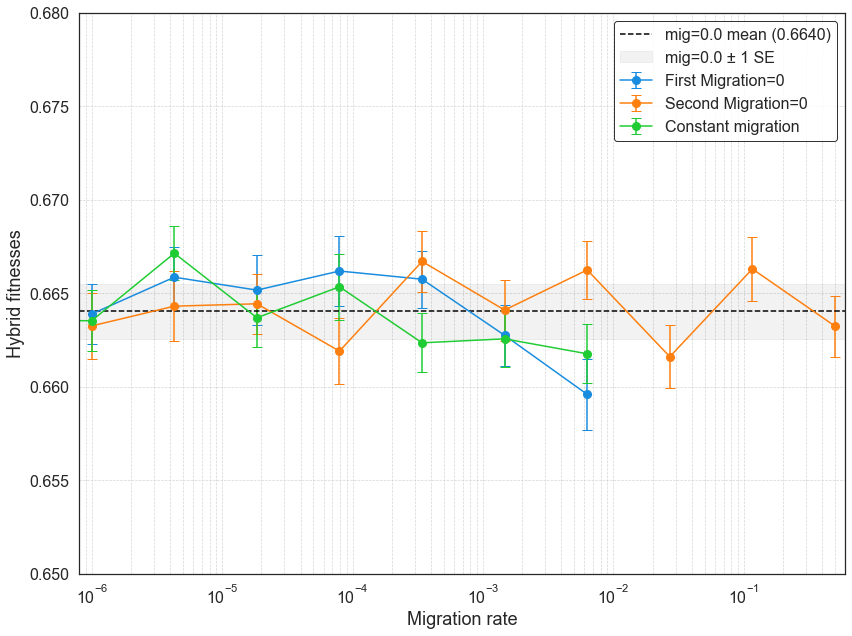

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_6pi.pdf に保存しました。


In [151]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi6_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi6_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi6_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi6_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi6_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  
    m_all_average_values = []  
    m_std_values = []  

    for mig in mig_values:
        if len(average_results[template][mig]) > 10:  
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )

   
    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat
mig_0_values = average_results['FGM_fitness_ecological_pi6_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10: 
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  
plt.ylim(0.65, 0.68)  
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_6pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()


平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi4_mig.csv に保存しました。


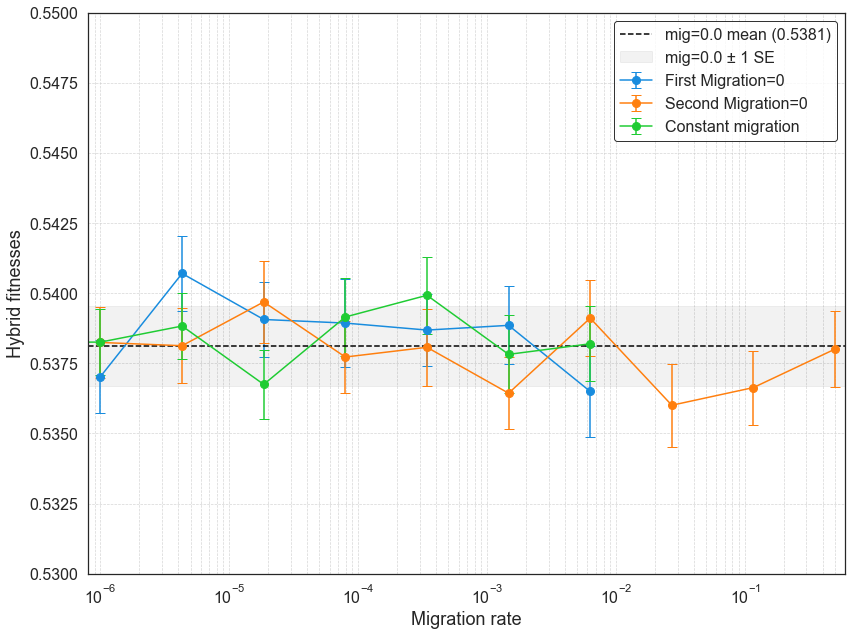

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_4pi.pdf に保存しました。


In [147]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi4_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi4_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi4_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi4_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi4_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  
    m_all_average_values = []  
    m_std_values = [] 

    for mig in mig_values:
        if len(average_results[template][mig]) > 10:  
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )


    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat
mig_0_values = average_results['FGM_fitness_ecological_pi4_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10:
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6)  
plt.ylim(0.53, 0.55)  
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_4pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()


平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_firstmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_secondmig.csv に保存しました。
平均値を /Users/ryamaguchi/Desktop/Output/Fitness/average_results_FGM_fitness_ecological_pi2_mig.csv に保存しました。


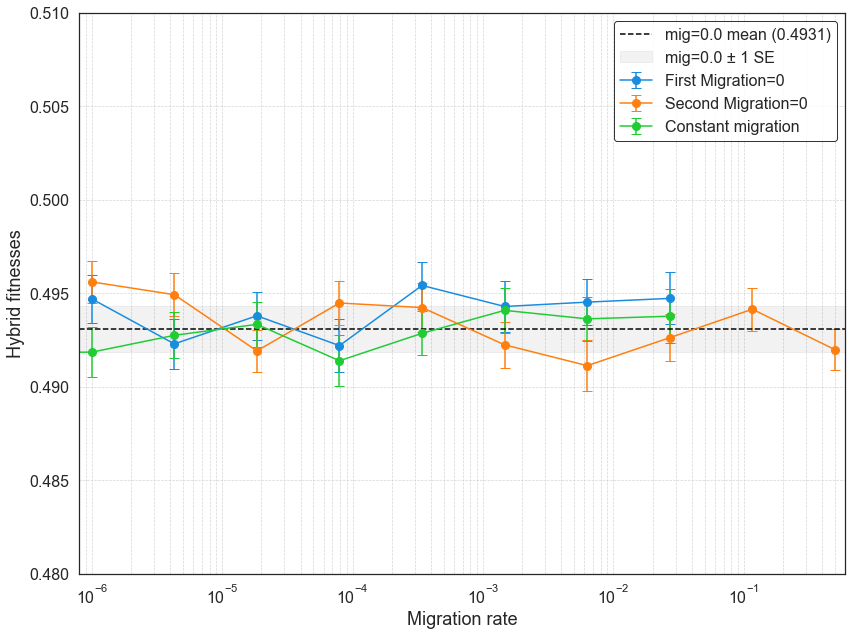

統合プロットを /Users/ryamaguchi/Desktop/Output/Fitness/combined_fitness_plot_2pi.pdf に保存しました。


In [154]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name
file_templates = [
    'FGM_fitness_ecological_pi2_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi2_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_ecological_pi2_mig={}_run={}_p3.dat'
]

# Dictionary to store average values
average_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# Loop through each template with mig and run
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_ecological_pi2_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_ecological_pi2_secondmig=0_mig={}_run={}_p3.dat']:
                continue

            file_path = template.format(mig, run_number)
            try:
                # Read file
                with open(file_path, 'r') as file:
                    data = file.read()

                # Parse data as numerical values (assume space-delimited)
                values = np.array(data.split(), dtype=float)

                # Calculate the mean value
                average = np.mean(values)
                average_results[template][mig].append(average)

            except FileNotFoundError:
                # print(f'File {file_path} not found.')
                pass
            except ValueError as e:
                print(f'ファイル {file_path} のデータが無効です: {e}')

# Save results for each template to a CSV file
for template in file_templates:
    output_csv = os.path.join(output_folder, f'average_results_{template.split("=")[0]}.csv')
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "average_value"])
        for mig in mig_values:
            for run_number, avg in enumerate(average_results[template][mig]):
                writer.writerow([mig, run_number, avg])
    print(f"平均値を {output_csv} に保存しました。")

# Combine plots into one
plt.figure(figsize=(12, 9))
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Modify to calculate and display standard errors (SE)
for idx, template in enumerate(file_templates):
    m_values_new = []  
    m_all_average_values = []  
    m_std_values = [] 

    for mig in mig_values:
        if len(average_results[template][mig]) > 10: 
            m_values_new.append(float(mig.replace('e', 'E')))
            m_all_average_values.append(np.mean(average_results[template][mig]))
            m_std_values.append(
                np.std(average_results[template][mig]) / np.sqrt(len(average_results[template][mig]))
            )

    
    if m_values_new:
        plt.errorbar(m_values_new, m_all_average_values, yerr=m_std_values, fmt='o-',
                     color=colors[idx], label=labels[idx], markersize=8, capsize=5)

# FGM_fitness_mig={}_run={}_p3.dat
mig_0_values = average_results['FGM_fitness_ecological_pi2_mig={}_run={}_p3.dat']['0.0']
if len(mig_0_values) > 10: 
    mig_0_mean = np.mean(mig_0_values)
    mig_0_se = np.std(mig_0_values) / np.sqrt(len(mig_0_values))

    
    plt.axhline(y=mig_0_mean, color='black', linestyle='--', label=f'mig=0.0 mean ({mig_0_mean:.4f})')
    plt.fill_between([10**(-6.1), 0.6],
                     mig_0_mean - mig_0_se,
                     mig_0_mean + mig_0_se,
                     color='black', alpha=0.05, label='mig=0.0 ± 1 SE')

# Graph settings
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlim(10**(-6.1), 0.6) 
plt.ylim(0.48, 0.51)  
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Hybrid fitnesses', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_2pi.pdf')
plt.savefig(plot_file, format='pdf')
plt.show()


In [ ]:
# Allele frequency spectrum

In [ ]:
# Speed of adaptation

世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations.csv に保存しました。


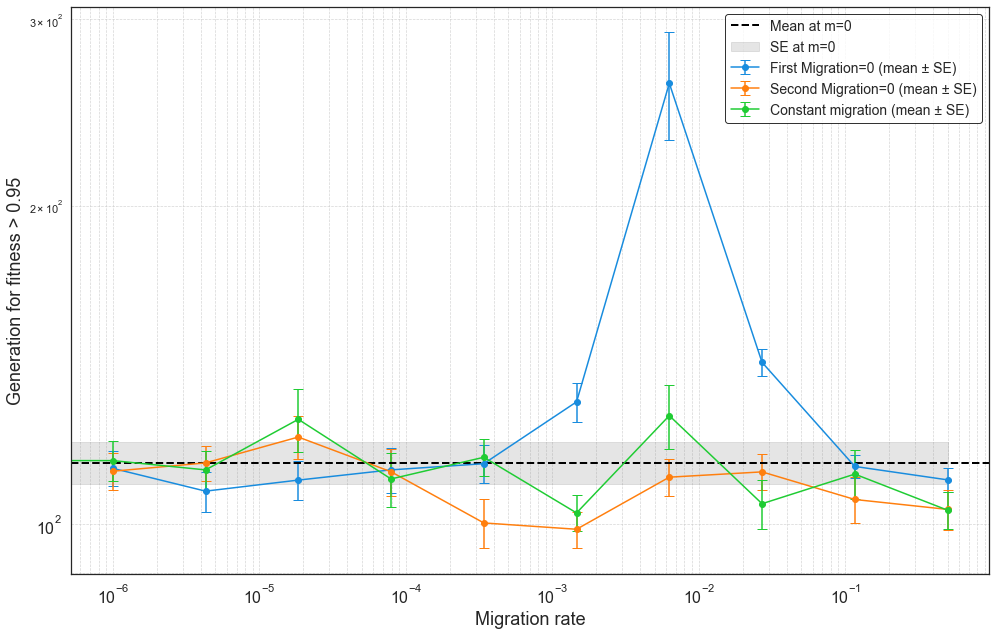

In [142]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05", "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# Common part of the file name templates
file_templates = [
    'FGM_experiment_mig={}_run={}_p1.dat',
    'FGM_experiment_mig={}_run={}_p2.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p1.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p2.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p1.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p2.dat'
]

# Additional required file conditions
required_templates = {
    'FGM_experiment_firstmig=0_mig={}_run={}_p1.dat': 'FGM_experiment_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_firstmig=0_mig={}_run={}_p2.dat': 'FGM_experiment_firstmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p1.dat': 'FGM_experiment_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_experiment_secondmig=0_mig={}_run={}_p2.dat': 'FGM_experiment_secondmig=0_mig={}_run={}_p3.dat'
}

# Graph colors and labels
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Calculate the generation at which fitness thresholds are reached for each mig and run
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # Conditionally load data based on required files
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # Extract the first generation where fitness exceeds 0.5 and 0.95
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # Determine scenario based on file path
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # Append results
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            

# Save results to CSV
output_file = os.path.join(output_folder, "fitness_generations.csv")
pd.DataFrame(results).to_csv(output_file, index=False)


# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Plot generation > 0.95
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
                 fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)")

# Display mean and SE at m=0
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between([min(results_df["mig_float"]), max(results_df["mig_float"])],
                     mean_0_95_at_zero - se_0_95_at_zero, mean_0_95_at_zero + se_0_95_at_zero,
                     color="gray", alpha=0.2, label="SE at m=0")

# Plot settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "generation_0_95_comparison.pdf"), format='pdf')
plt.show()


世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi6.csv に保存しました。


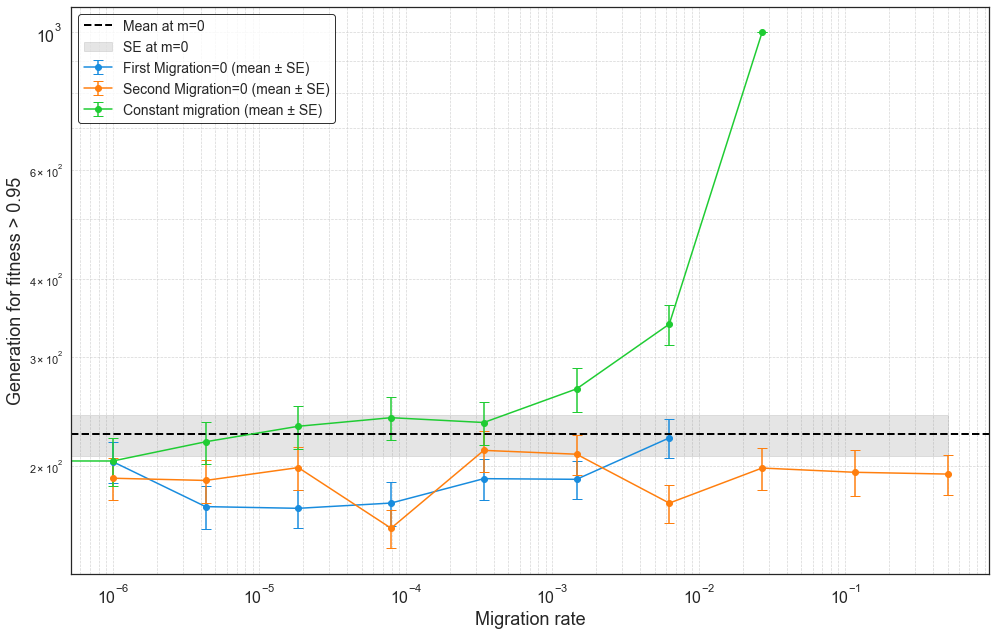

In [157]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Specify pi value (e.g., pi2, pi4, pi6)
pi_value = "pi6"  # Can be changed to any value such as "pi4", "pi6"

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05",
    "0.000341095", "0.00146587", "0.00629961", "0.0270727",
    "0.116346", "0.5"
]

# Common part of the file name templates
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# Additional required file templates
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat': 
        f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat': 
        f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat': 
        f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat': 
        f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# Colors and labels for the plots
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Calculate the generation where fitness thresholds are reached for each migration rate and run
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # Conditionally load data based on required files
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # Extract the first generation where fitness exceeds 0.5 and 0.95
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # Determine scenario based on file path
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # Append results to the list
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass


# Save results to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)


# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Plot generation > 0.95
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(
        summary["mig_float"], summary["mean_0_95"], yerr=summary["se_0_95"], 
        fmt="o-", color=colors[idx], capsize=5, label=f"{condition} (mean ± SE)"
    )

# Display mean and SE at m=0
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(
        y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2,
        label="Mean at m=0"
    )
    plt.fill_between(
        [min(results_df["mig_float"]), max(results_df["mig_float"])],
        mean_0_95_at_zero - se_0_95_at_zero,
        mean_0_95_at_zero + se_0_95_at_zero,
        color="gray", alpha=0.2, label="SE at m=0"
    )

# Plot settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()
plt.savefig(
    os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"),
    format='pdf'
)
plt.show()


世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi4.csv に保存しました。


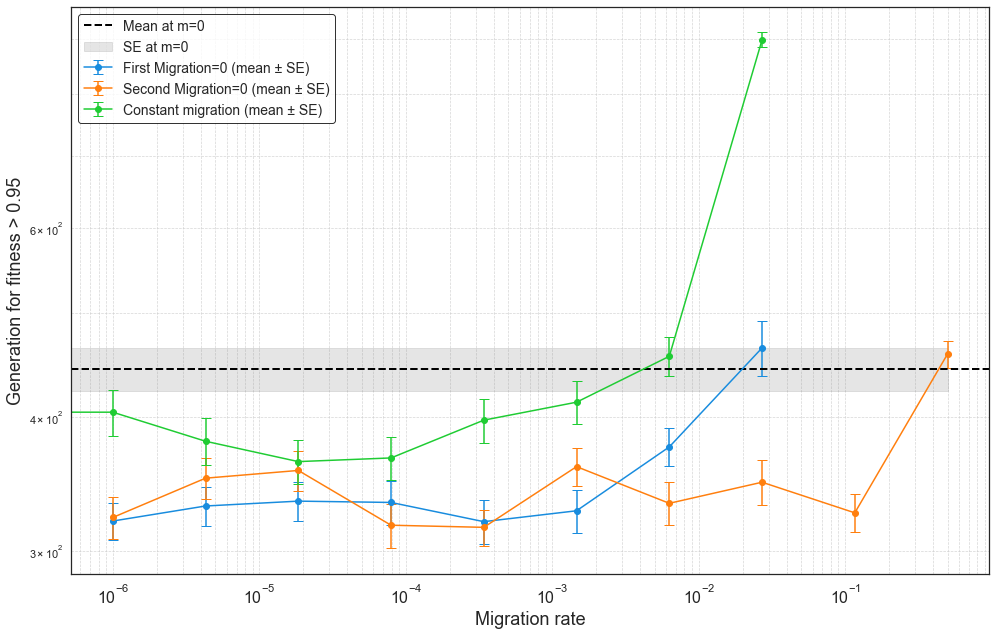

In [160]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Specify pi value (e.g., pi2, pi4, pi6)
pi_value = "pi4"  # Changeable to "pi2", "pi6", etc.

# List of migration (mig) values in ascending order
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05",
    "0.000341095", "0.00146587", "0.00629961", "0.0270727",
    "0.116346", "0.5"
]

# File name templates for the different simulation outputs
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# Additional required file templates for scenarios with p3 data
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat':
        f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat':
        f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat':
        f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat':
        f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# Plot colors and scenario labels
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Create output directory if it doesn't exist
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Collect the generation at which fitness thresholds are reached for each migration rate and run
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # Skip loading if the additional required file is missing
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load simulation data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # Find the first generation where fitness exceeds 0.5 and 0.95
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # Determine scenario based on filename
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # Append the result record
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            except pd.errors.EmptyDataError:
                print(f'File {file_path} is empty.')
            except Exception as e:
                print(f'Error processing file {file_path}: {e}')

# Save the collected data to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"Saved generation data to {output_file}")

# Convert to DataFrame for plotting
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use seaborn style for plotting
sns.set(style="white")

# Plot the generation at which fitness > 0.95
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    df_cond = results_df[results_df["condition"] == condition]
    summary = df_cond.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(
        summary["mig_float"], 
        summary["mean_0_95"], 
        yerr=summary["se_0_95"], 
        fmt="o-", 
        color=colors[idx], 
        capsize=5, 
        label=f"{condition} (mean ± SE)"
    )

# Add horizontal line and shaded SE region at m=0
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_zero = zero_df["generation_0_95"].mean()
    se_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(mean_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between(
        [min(results_df["mig_float"]), max(results_df["mig_float"])],
        mean_zero - se_zero, 
        mean_zero + se_zero,
        color="gray", 
        alpha=0.2, 
        label="SE at m=0"
    )

# Final plot formatting
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, frameon=True, edgecolor="black")
plt.tight_layout()

# Save and show the figure
plt.savefig(
    os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"),
    format='pdf'
)
plt.show()


世代データを /Users/ryamaguchi/Desktop/Output/fitness_generations_ecological_pi2.csv に保存しました。


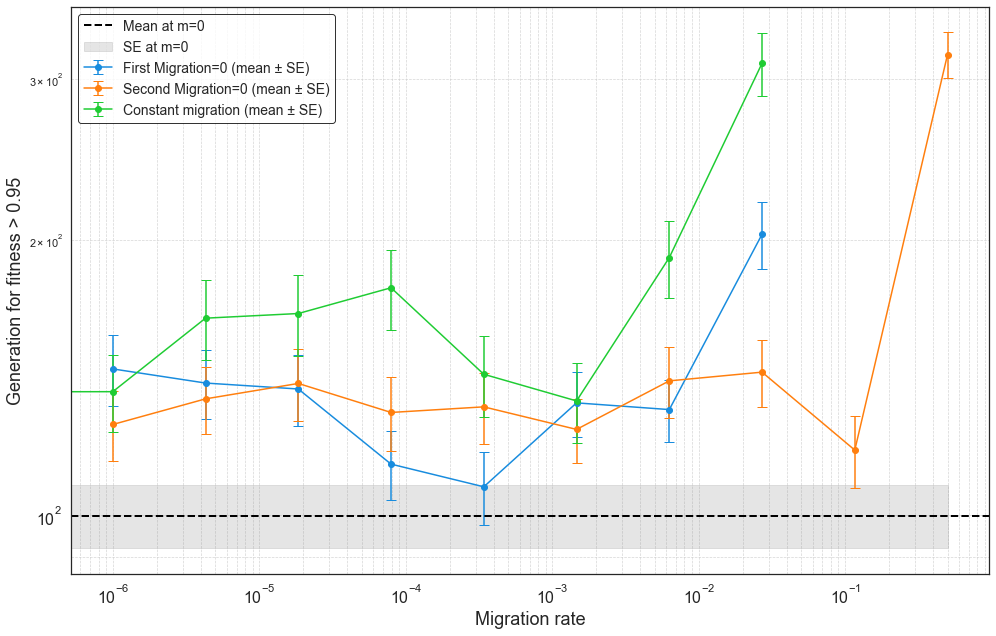

In [155]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Specify pi value (e.g., pi2, pi4, pi6)
pi_value = "pi2"  # Can be changed to "pi4", "pi6", etc.

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05",
    "0.000341095", "0.00146587", "0.00629961", "0.0270727",
    "0.116346", "0.5"
]

# Common part of the file name templates
file_templates = [
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat'
]

# Additional required file templates for p3 data
required_templates = {
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_firstmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p1.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat',
    f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p2.dat': f'FGM_experiment_ecological_{pi_value}_secondmig=0_mig={{}}_run={{}}_p3.dat'
}

# Plot colors and labels
colors = ['# Color codes for plots
labels = ['First Migration=0', 'Second Migration=0', 'Constant migration']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Calculate the generation at which fitness thresholds are reached for each migration rate and run
results = []

for mig in mig_values:
    for run_number in range(100):
        for file_template in file_templates:
            file_path = file_template.format(mig, run_number)
            required_file = required_templates.get(file_template, None)
            required_file_path = required_file.format(mig, run_number) if required_file else None

            # Conditionally load data based on required files
            if required_file_path and not os.path.exists(required_file_path):
                continue

            try:
                # Load data
                data = pd.read_csv(file_path, delim_whitespace=True)

                # Extract the first generation where fitness exceeds 0.5 and 0.95
                generation_0_5 = data[data['fitness'] > 0.5]['generation'].min()
                generation_0_95 = data[data['fitness'] > 0.95]['generation'].min()

                # Determine scenario based on file path
                if "firstmig=0" in file_path:
                    condition = "First Migration=0"
                elif "secondmig=0" in file_path:
                    condition = "Second Migration=0"
                else:
                    condition = "Constant migration"

                # Append results to the list
                results.append({
                    "mig": mig,
                    "condition": condition,
                    "run_number": run_number,
                    "generation_0_5": generation_0_5,
                    "generation_0_95": generation_0_95
                })

            except FileNotFoundError:
                pass
            except pd.errors.EmptyDataError:
                print(f'File {file_path} is empty.')
            except Exception as e:
                print(f'Error processing file {file_path}: {e}')

# Save results to CSV
output_file = os.path.join(output_folder, f"fitness_generations_ecological_{pi_value}.csv")
pd.DataFrame(results).to_csv(output_file, index=False)
print(f"Saved generation data to {output_file}")

# Analyze and plot results
results_df = pd.DataFrame(results)
results_df["mig_float"] = results_df["mig"].astype(float)

# Use seaborn style for an elegant appearance
sns.set(style="white")

# Plot generation for fitness > 0.95
plt.figure(figsize=(14, 9))
for idx, condition in enumerate(labels):
    condition_df = results_df[results_df["condition"] == condition]
    summary = condition_df.groupby("mig_float").agg(
        mean_0_95=("generation_0_95", "mean"),
        se_0_95=("generation_0_95", lambda x: np.std(x) / np.sqrt(len(x)))
    ).reset_index()
    plt.errorbar(
        summary["mig_float"],
        summary["mean_0_95"],
        yerr=summary["se_0_95"],
        fmt="o-",
        color=colors[idx],
        capsize=5,
        label=f"{condition} (mean ± SE)"
    )

# Display mean and SE at m=0
if 0.0 in results_df["mig_float"].values:
    zero_df = results_df[results_df["mig_float"] == 0.0]
    mean_0_95_at_zero = zero_df["generation_0_95"].mean()
    se_0_95_at_zero = zero_df["generation_0_95"].std() / np.sqrt(len(zero_df))
    plt.axhline(y=mean_0_95_at_zero, color="black", linestyle="--", linewidth=2, label="Mean at m=0")
    plt.fill_between(
        [min(results_df["mig_float"]), max(results_df["mig_float"])],
        mean_0_95_at_zero - se_0_95_at_zero,
        mean_0_95_at_zero + se_0_95_at_zero,
        color="gray",
        alpha=0.2,
        label="SE at m=0"
    )

# Plot settings
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Migration rate", fontsize=18)
plt.ylabel("Generation for fitness > 0.95", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.7, alpha=0.8)
plt.legend(fontsize=14, fancybox=True, frameon=True, edgecolor="black", shadow=False)
plt.tight_layout()

# Save and show plot
plt.savefig(os.path.join(output_folder, f"generation_0_95_comparison_ecological_{pi_value}.pdf"), format='pdf')
plt.show()


In [ ]:
# Example of evolutionary trajectories

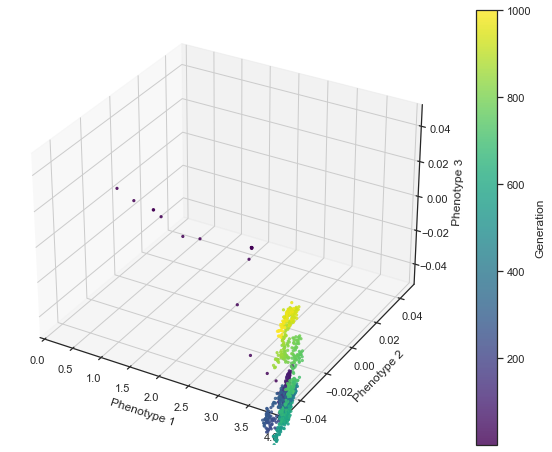

In [62]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Graph save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Save plot as an .svg file for Adobe Illustrator editing

# Use Seaborn style for an elegant appearance
sns.set(style="white")

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output")
os.makedirs(output_folder, exist_ok=True)

# Extract the phenotype columns for visualization
phenotype_columns = ['phenotype1', 'phenotype2', 'phenotype3', 'phenotype4']
phenotypes = data[phenotype_columns]

# Create a 3D scatter plot for the first three phenotypes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    phenotypes['phenotype1'],
    phenotypes['phenotype2'],
    phenotypes['phenotype3'],
    c=data['generation'],
    cmap='viridis',
    s=5,
    alpha=0.8
)

# Set axis limits
ax.set_xlim([0, 4])
ax.set_ylim([-0.05, 0.05])
ax.set_zlim([-0.05, 0.05])

# Add color bar for generations
cbar = fig.colorbar(scatter, ax=ax, label='Generation')

# Label the axes
ax.set_xlabel('Phenotype 1')
ax.set_ylabel('Phenotype 2')
ax.set_zlabel('Phenotype 3')

# Specify save destination
file_name = os.path.join(output_folder, "trajectory_plot.svg")
plt.savefig(file_name, format='svg')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Plot save settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  # Enable saving as .svg for Adobe Illustrator editing

# Seaborn style
sns.set(style="white")
colors = ['#1fcc33', '#ff7f0e', '#188cde']

# Output folder
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)

# List of migration (mig) values (ascending order)
mig_values = [
    "0.0", "1.0e-06", "4.29753e-06", "1.84688e-05", "7.93701e-05",
    "0.000341095", "0.00146587", "0.00629961", "0.0270727", "0.116346", "0.5"
]

# File name templates
file_templates = [
    'FGM_fitness_mig={}_run={}_p3.dat',
    'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat',
    'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat'
]

# Dictionary to store variance results
dispersion_results = {template: {mig: [] for mig in mig_values} for template in file_templates}

# For each template, load data from files and calculate variance
for template in file_templates:
    for mig in mig_values:
        for run_number in range(100):
            if mig == "0.0" and template in [
                'FGM_fitness_firstmig=0_mig={}_run={}_p3.dat',
                'FGM_fitness_secondmig=0_mig={}_run={}_p3.dat'
            ]:
                continue

            file_path = template.format(mig, run_number)
            try:
                with open(file_path, 'r') as file:
                    data = file.read()
                values = np.array(data.split(), dtype=float)

                # Calculate variance
                variance = np.var(values)
                dispersion_results[template][mig].append(variance)

            except FileNotFoundError:
                pass
            

# Save variance results to CSV
for template in file_templates:
    output_csv = os.path.join(
        output_folder,
        f'variance_results_{template.split("=")[0]}.csv'
    )
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["mig", "runNumber", "variance_value"])
        for mig in mig_values:
            for run_number, var in enumerate(dispersion_results[template][mig]):
                writer.writerow([mig, run_number, var])

# Generate the plot
plt.figure(figsize=(12, 9))
labels = ['Constant migration', 'Early-phase migration', 'Late-phase migration']

for idx, template in enumerate(file_templates):
    m_values_new = [float(m.replace('e', 'E')) for m in mig_values]
    # Calculate mean variance and standard error
    mean_vars = [
        np.mean(dispersion_results[template][mig]) if dispersion_results[template][mig] else 0
        for mig in mig_values
    ]
    se_vars = [
        np.std(dispersion_results[template][mig]) / np.sqrt(len(dispersion_results[template][mig]))
        if dispersion_results[template][mig] else 0
        for mig in mig_values
    ]

    # Plot with error bars
    plt.errorbar(
        m_values_new,
        mean_vars,
        yerr=se_vars,
        fmt='o-', markersize=8, capsize=5,
        color=colors[idx], label=labels[idx]
    )

# Mean variance for mig=0.0 under constant migration
mig0_vals = dispersion_results['FGM_fitness_mig={}_run={}_p3.dat']['0.0']
mig0_mean = np.mean(mig0_vals)
mig0_se = np.std(mig0_vals) / np.sqrt(len(mig0_vals))

# Plot horizontal line and shaded SE region for no migration
plt.axhline(y=mig0_mean, color='black', linestyle='--', label='No migration (mean)')
plt.fill_between(
    [min(m_values_new), max(m_values_new)],
    mig0_mean - mig0_se,
    mig0_mean + mig0_se,
    alpha=0.1, label='No migration (± 1 SE)'
)

# Plot settings (set y-axis lower limit to 0)
plt.xscale('log')
plt.xlim(1e-6, 0.6)
plt.ylim(0, None)
plt.xlabel('Migration rate', fontsize=18)
plt.ylabel('Variance of hybrid fitness', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.8)
plt.legend(fontsize=16, frameon=True)
plt.tight_layout()

# Save and show plot
plot_file = os.path.join(output_folder, 'combined_fitness_plot_with_variance.pdf')
plt.savefig(plot_file)
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42  

sns.set(style="whitegrid")


file1 = "FGM_parent_endfitness_mig=0.0_run=1_p1.dat"
file2 = "FGM_fitness_mig=0.0_run=2_p3.dat"


values1 = np.loadtxt(file1)
values2 = np.loadtxt(file2)


df = pd.DataFrame({
    "Parent": values1,
    "F2 hybrids": values2
})
df_melted = df.melt(var_name="Group", value_name="Fitness")


plt.figure(figsize=(8, 6))

sns.stripplot(
    x="Group", y="Fitness", data=df_melted,
    jitter=0.3, size=5,
    palette=["#1fcc33", "#188cde"],
    edgecolor="gray", linewidth=0.5
)

plt.ylabel("Fitness", fontsize=14)
plt.tight_layout()


output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)
plot_path = os.path.join(output_folder, "scatter_mig0_runs.pdf")
plt.savefig(plot_path, dpi=300)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the datasets
file1 = "FGM_parent_fitness_mig=0.0_run=1_p1.dat"
file2 = "FGM_parent_fitness_mig=0.0270727_run=1_p2.dat"

df1 = pd.read_csv(file1, delim_whitespace=True, header=None)
df2 = pd.read_csv(file2, delim_whitespace=True, header=None)

# Compute mean and standard deviation bounds
def compute_mean_std(df):
    mean = df.mean(axis=1)
    std = df.std(axis=1)
    lower = mean - std
    upper = mean + std
    return mean.to_numpy(), lower.to_numpy(), upper.to_numpy()

mean1, lower1, upper1 = compute_mean_std(df1)
mean2, lower2, upper2 = compute_mean_std(df2)

# Time axis
time = np.arange(df1.shape[0])

# Plot settings
x_limit = (0, 200)

# Use visually distinct colors
color1 = 'gray'
color2 = 'red'

# Combined plot
plt.figure(figsize=(12, 6))
plt.plot(time, mean1, color=color1, label='Pop1 Mean')
plt.fill_between(time, lower1, upper1, color=color1, alpha=0.3, label='Pop1 ±1 SD')

plt.plot(time, mean2, color=color2, label='Pop2 Mean')
plt.fill_between(time, lower2, upper2, color=color2, alpha=0.3, label='Pop2 ±1 SD')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xlim(x_limit)

# Show only horizontal grid lines
plt.grid(axis='x')  # Only horizontal lines

# Save the figure
output_folder = os.path.expanduser("~/Desktop/Output/Fitness")
os.makedirs(output_folder, exist_ok=True)
plot_path = os.path.join(output_folder, "parent_fitness.pdf")
plt.savefig(plot_path, dpi=300)
plt.show()